                        Національний університет “Львівська політехніка”

                           Інститут математики та фундаментальних наук

                                   Кафедра прикладної математики 


                                Звіт до лабораторної роботи №1
                        "Наближення функції тригонометричним рядом Фур’є"
                                            з курсу
                          "Математичні основи цифрової обробки сигналів"


                                       
                                      
                                      
                                      
                                      
                                      
                                                                           Виконав:
                                                                           студент групи ПМ-33
                                                                           Войтків Дмитро
                                                                           
                                                                           
                                                                           
                                                                           Перевірив:
                                                                           к.ф-м.н., доцент
                                                                           Пабирівський В.В.

    
    
    
    
    
    
    
    
                                            Львів 2023
                                           
                                           
                                           

Мета роботи : зрозуміти зміст розкладу функції у тригонометричний ряд Фур’є та навчитися використовувати такий розклад для наближення (апроксимації) функцій, а також оцінювати похибку наближення.

                                        Хід роботи

Завдання 1.
Реалізувати підпрограму (процедуру чи функцію), що виконуватиме точне аналітичне обчислення значення функції, яку розкладатимете у ряд Фур’є:  f(x) = n · sin (πnx) на інтервалі [-π, π]

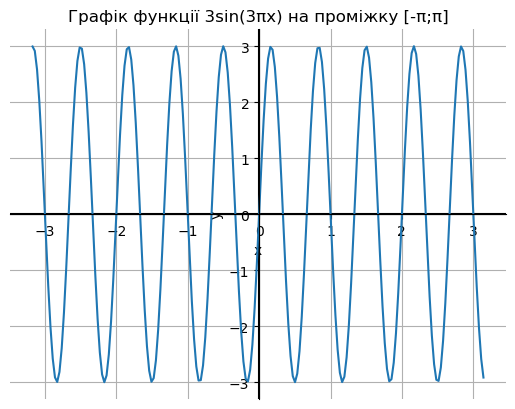

In [1]:
import math
import matplotlib.pyplot as plt

def plot_func():
    # Створення списку точок x на проміжку [-π;π]
    x = [i * 0.01 * math.pi for i in range(-101, 101)]

    # Обчислення значень функції 3· sin (3πx) для кожної точки x
    y = [3 * math.sin(3 * math.pi * x_i) for x_i in x]

    # Налаштування координатної площини та відображення синусоїди
    fig, ax = plt.subplots()
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Графік функції 3sin(3πx) на проміжку [-π;π]')
    plt.grid(True)

    # Відображення графіку
    plt.show()

# Виклик функції для відображення графіку
plot_func()


First coeff a_0 =  0.0
a_k     | b_k     
0.00000 |  0.02114
0.00000 |  -0.04378
0.00000 |  0.06978
0.00000 |  -0.10198
0.00000 |  0.14546
0.00000 |  -0.21089
0.00000 |  0.32635
0.00000 |  -0.59832
0.00000 |  2.13520
0.00000 |  1.66176
0.00000 |  -0.63482
0.00000 |  0.40384
0.00000 |  -0.30107
0.00000 |  0.24255
0.00000 |  -0.20453
0.00000 |  0.17771
0.00000 |  -0.15769
0.00000 |  0.14212
0.00000 |  -0.12962
0.00000 |  0.11934
0.00000 |  -0.11072
0.00000 |  0.10337
0.00000 |  -0.09702
0.00000 |  0.09147
0.00000 |  -0.08658
0.00000 |  0.08222
0.00000 |  -0.07831
0.00000 |  0.07479
0.00000 |  -0.07159
Fourier series sum =  -1.5922280938938886e-16


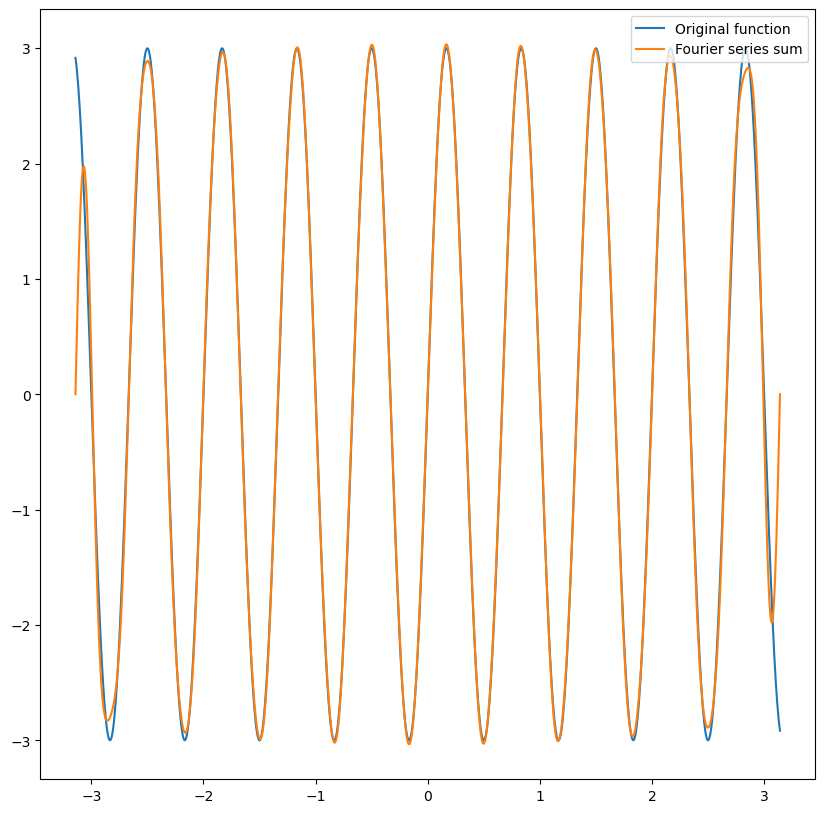

In [122]:
import numpy as np
from scipy import integrate
import math
import matplotlib.pyplot as plt

def f(x):
    return 3*np.sin(3 * math.pi * x)

def first_coeff(f):
    a_0 = 1/math.pi * integrate.quad(f,-math.pi,math.pi)[0]  
    return a_0

def a_coeffs(f):
    a_coeff = []
    for k in range(30):
        a_k = 1/math.pi * integrate.quad(lambda x: f(x) * np.cos(k*x), -math.pi, math.pi)[0]
        a_coeff.append(a_k)
    new_a_coeff = a_coeff[1::]
    return new_a_coeff
    
def b_coeffs(f):
    b_coeff = []
    for k in range(30):
        b_k = 1/math.pi * integrate.quad(lambda x: f(x) * np.sin(k*x), -math.pi, math.pi)[0]
        b_coeff.append(b_k)
    new_b_coeff = b_coeff[1::]
    return new_b_coeff

def fourier_series(x, k, a_coeffs, b_coeffs):
    series_sum = a_coeffs[0] / 2
    for i in range(1, 30):
        series_sum += a_coeffs[i-1] * np.cos(i * x) + b_coeffs[i-1] * np.sin(i * x)
    return series_sum

a_0 = first_coeff(f)
a_k = a_coeffs(f)
b_k = b_coeffs(f)

series_sum = np.mean([fourier_series(x, 21, a_k, b_k) for x in np.linspace(-np.pi, np.pi, 100)])

print("First coeff a_0 = ",a_0)
print("{0:8}| {1:8}".format("a_k", "b_k"))
for a, b in zip(a_k, b_k):
    print("{:.5f} |  {:.5f}".format(a, b))

print("Fourier series sum = ", series_sum)


x = np.linspace(-np.pi, np.pi, 1000)
y = f(x)
fourier_sum = fourier_series(x, 21, a_k, b_k)

plt.plot(x, y, label='Original function')
plt.plot(x, fourier_sum, label='Fourier series sum')
plt.legend(loc = "upper right")
plt.show()


First coeff a_0 =  0.0
a_k     | b_k     
0.00000 |  0.02114
0.00000 |  -0.04378
0.00000 |  0.06978
0.00000 |  -0.10198
0.00000 |  0.14546
0.00000 |  -0.21089
0.00000 |  0.32635
0.00000 |  -0.59832
0.00000 |  2.13520
0.00000 |  1.66176
0.00000 |  -0.63482
0.00000 |  0.40384
0.00000 |  -0.30107
0.00000 |  0.24255
0.00000 |  -0.20453
0.00000 |  0.17771
0.00000 |  -0.15769
0.00000 |  0.14212
0.00000 |  -0.12962
0.00000 |  0.11934
Fourier series sum =  -1.4964507003869464e-16


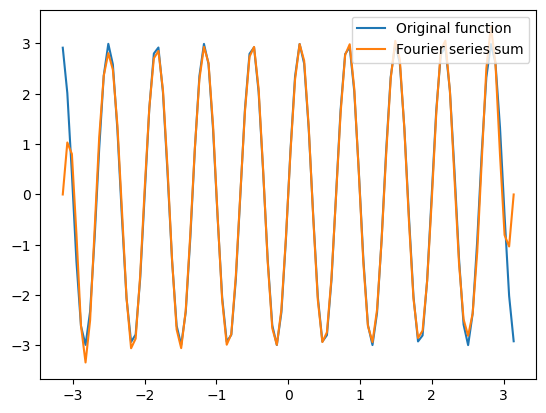

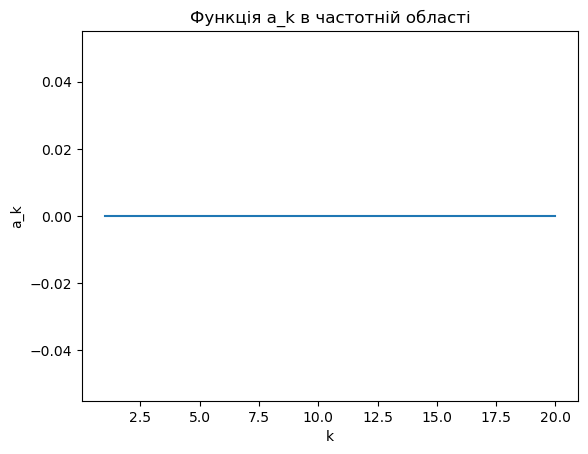

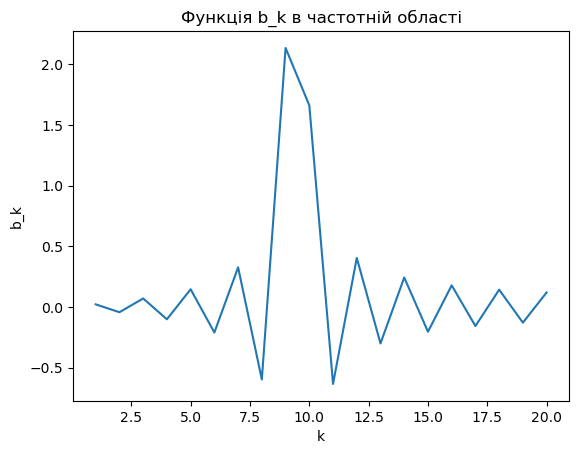

In [67]:
import numpy as np
from scipy import integrate
import math
import matplotlib.pyplot as plt

def f(x):
    return 3*np.sin(3 * math.pi * x)

def first_coeff(f):
    a_0 = 1/math.pi * integrate.quad(f,-math.pi,math.pi)[0]  
    return a_0

def a_coeffs(f):
    a_coeff = []
    for k in range(31):
        a_k = 1/math.pi * integrate.quad(lambda x: f(x) * np.cos(k*x), -math.pi, math.pi)[0]
        a_coeff.append(a_k)
    new_a_coeff = a_coeff[1::]
    return new_a_coeff
    
def b_coeffs(f):
    b_coeff = []
    for k in range(31):
        b_k = 1/math.pi * integrate.quad(lambda x: f(x) * np.sin(k*x), -math.pi, math.pi)[0]
        b_coeff.append(b_k)
    new_b_coeff = b_coeff[1::]
    return new_b_coeff

def fourier_series(x, a_coeffs, b_coeffs):
    k = len(a_coeffs)
    series_sum = a_coeffs[0] / 2
    for i in range(1, k):
        series_sum += a_coeffs[i-1] * np.cos(i * x) + b_coeffs[i-1] * np.sin(i * x)
    return series_sum

a_0 = first_coeff(f)
a_k = a_coeffs(f)
b_k = b_coeffs(f)

series_sum = np.mean([fourier_series(x, a_k, b_k) for x in np.linspace(-np.pi, np.pi, 100)])

print("First coeff a_0 = ",a_0)
print("{0:8}| {1:8}".format("a_k", "b_k"))
for a, b in zip(a_k, b_k):
    print("{:.5f} |  {:.5f}".format(a, b))

print("Fourier series sum = ", series_sum)



x = np.linspace(-np.pi, np.pi, 100)
y = f(x)
fourier_sum = fourier_series(x, a_k, b_k)

plt.plot(x, y, label='Original function')
plt.plot(x, fourier_sum, label='Fourier series sum')
plt.legend(loc = "upper right")
plt.show()
def plot_harmonics(coefficients, name):
    k_values = range(1, len(coefficients)+1)
    plt.plot(k_values, coefficients)
    plt.xlabel("k")
    plt.ylabel(name)
    plt.title("Функція "+ name + " в частотній області")
    plt.show()

plot_harmonics(a_k, "a_k")
plot_harmonics(b_k, "b_k")


First coeff a_0 =  0.0
a_k     | b_k     
0.00000 |  0.02114
0.00000 |  -0.04378
0.00000 |  0.06978
0.00000 |  -0.10198
0.00000 |  0.14546
0.00000 |  -0.21089
0.00000 |  0.32635
0.00000 |  -0.59832
0.00000 |  2.13520
0.00000 |  1.66176
0.00000 |  -0.63482
0.00000 |  0.40384
0.00000 |  -0.30107
0.00000 |  0.24255
0.00000 |  -0.20453
0.00000 |  0.17771
0.00000 |  -0.15769
0.00000 |  0.14212
0.00000 |  -0.12962
0.00000 |  0.11934
0.00000 |  -0.11072
0.00000 |  0.10337
0.00000 |  -0.09702
0.00000 |  0.09147
0.00000 |  -0.08658
0.00000 |  0.08222
0.00000 |  -0.07831
0.00000 |  0.07479
0.00000 |  -0.07159
0.00000 |  0.06867
Fourier series sum =  -1.5922280938938886e-16


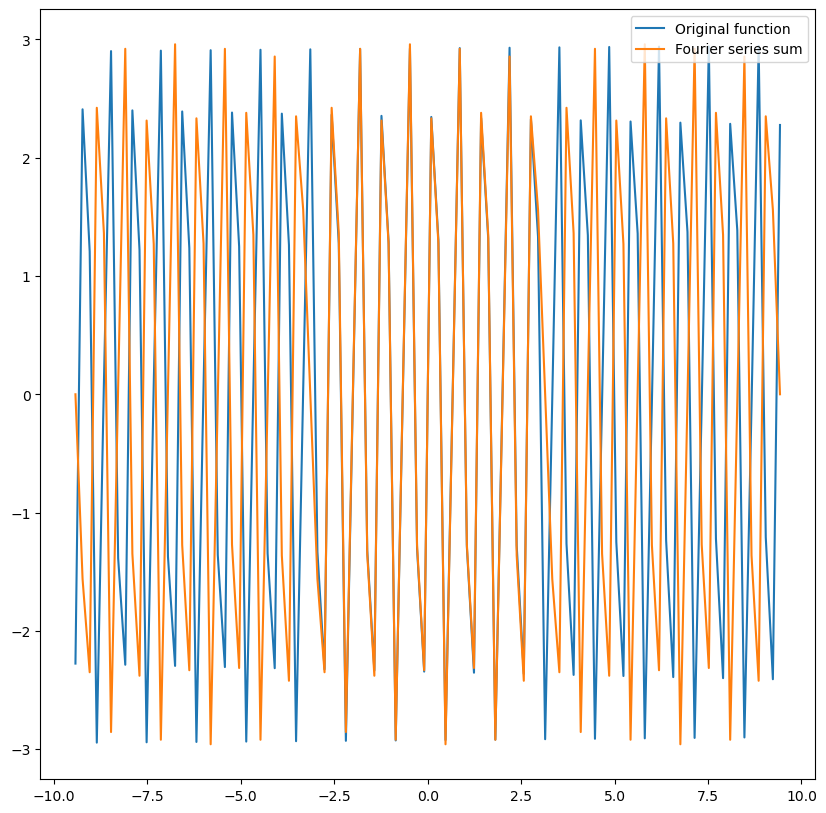

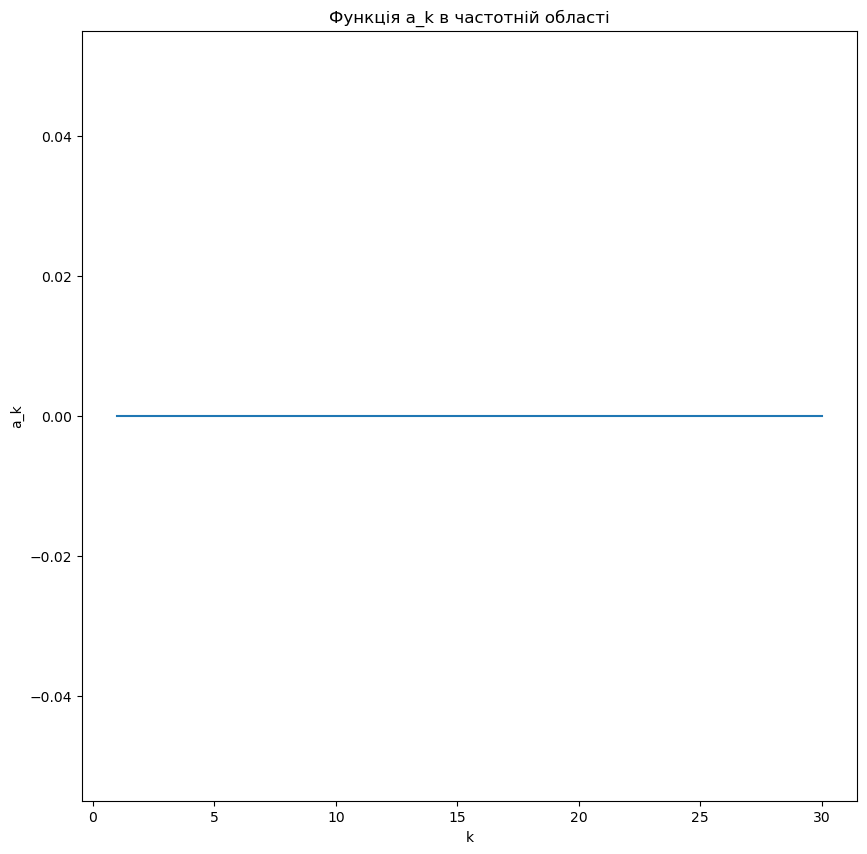

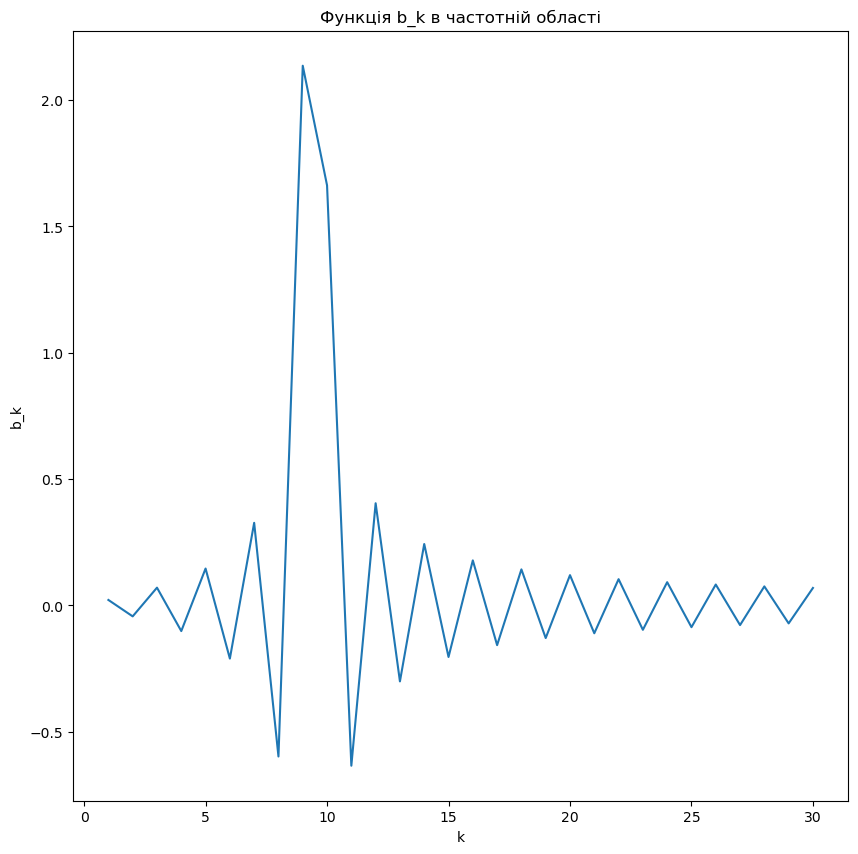

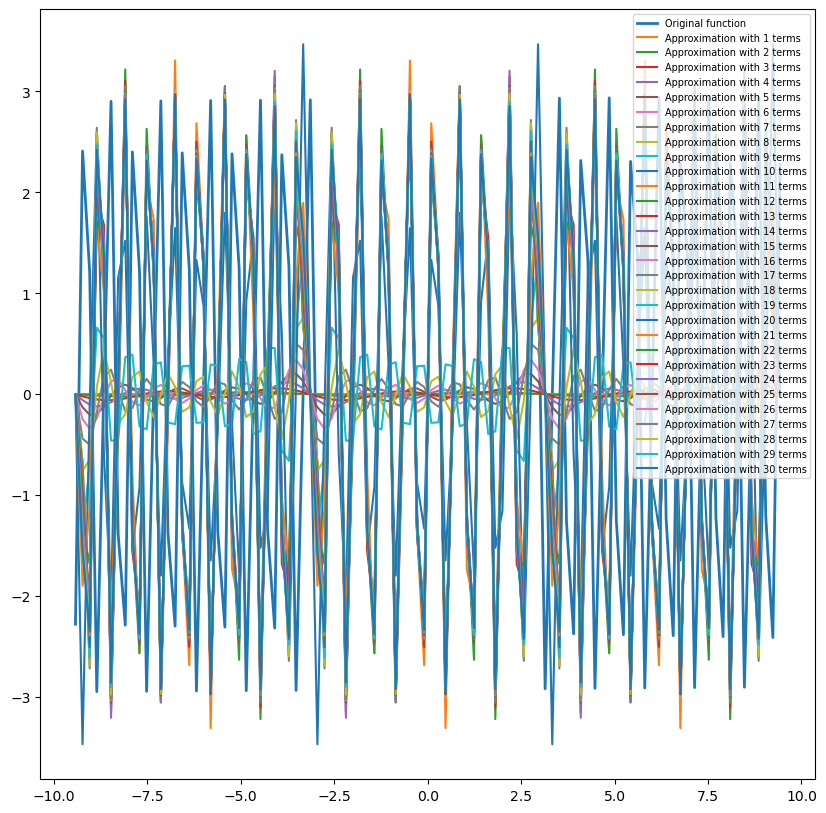

Relative error:  1.5602643010813284


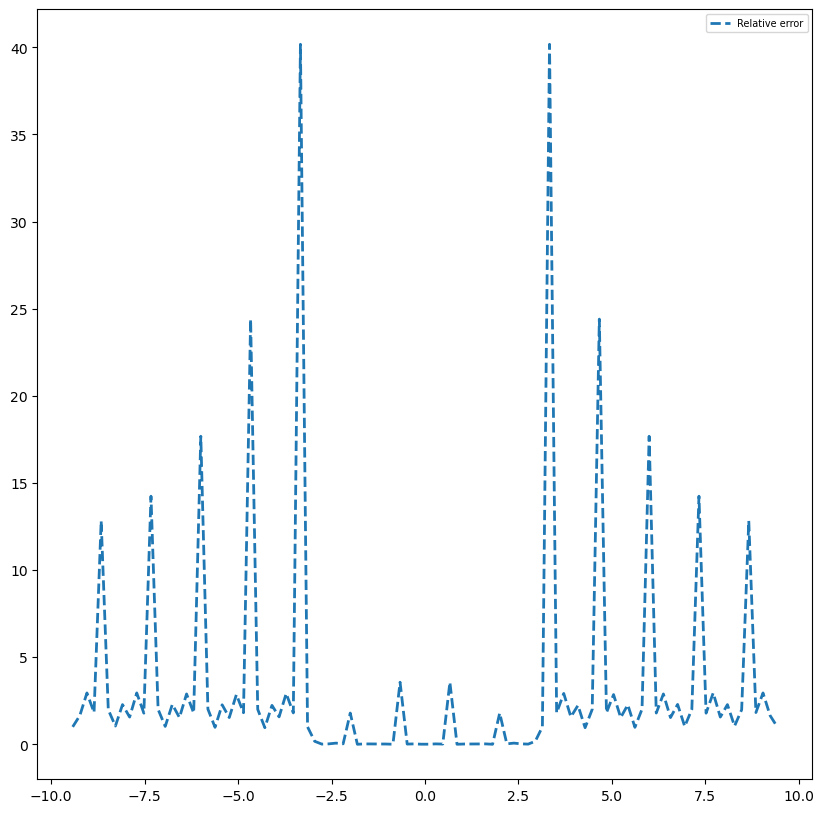

Дані успішно збережено у файл: fourier_coeffs.txt


In [13]:
import numpy as np
from scipy import integrate
import math
import matplotlib.pyplot as plt

plt.rcParams ['figure.figsize'] = [10, 10]

def f(x):
    return 3*np.sin(3 * math.pi * x)

def first_coeff(f):
    a_0 = 1/math.pi * integrate.quad(f,-3*math.pi,3*math.pi)[0]  
    return a_0

def a_coeffs(f):
    a_coeff = []
    for k in range(31):
        a_k = 1/math.pi * integrate.quad(lambda x: f(x) * np.cos(k*x), -math.pi, math.pi)[0]
        a_coeff.append(a_k)
    new_a_coeff = a_coeff[1::]
    return new_a_coeff
    
def b_coeffs(f):
    b_coeff = []
    for k in range(31):
        b_k = 1/math.pi * integrate.quad(lambda x: f(x) * np.sin(k*x), -math.pi, math.pi)[0]
        b_coeff.append(b_k)
    new_b_coeff = b_coeff[1::]
    return new_b_coeff

def fourier_series(x, a_coeffs, b_coeffs):
    k = len(a_coeffs)
    series_sum = a_coeffs[0] / 2
    for i in range(1, k):
        series_sum += a_coeffs[i-1] * np.cos(i * x) + b_coeffs[i-1] * np.sin(i * x)
    return series_sum

a_0 = first_coeff(f)
a_k = a_coeffs(f)
b_k = b_coeffs(f)

series_sum = np.mean([fourier_series(x, a_k, b_k) for x in np.linspace(-np.pi, np.pi, 100)])

print("First coeff a_0 = ",a_0)
print("{0:8}| {1:8}".format("a_k", "b_k"))
for a, b in zip(a_k, b_k):
    print("{:.5f} |  {:.5f}".format(a, b))

print("Fourier series sum = ", series_sum)



x = np.linspace(-3*np.pi, 3*np.pi, 100)
y = f(x)
fourier_sum = fourier_series(x, a_k, b_k)

plt.plot(x, y, label='Original function')
plt.plot(x, fourier_sum, label='Fourier series sum')
plt.legend(loc = "upper right")
plt.show()

def plot_harmonics(coefficients, name):
    k_values = range(1, len(coefficients)+1)
    plt.plot(k_values, coefficients)
    plt.xlabel("k")
    plt.ylabel(name)
    plt.title("Функція "+ name + " в частотній області")
    plt.show()

plot_harmonics(a_k, "a_k")
plot_harmonics(b_k, "b_k")

def fourier_series(x, a_coeffs, b_coeffs):
    k = len(a_coeffs)
    series_sum = a_coeffs[0] / 2
    for i in range(1, k):
        series_sum += a_coeffs[i-1] * np.cos(i * x) + b_coeffs[i-1] * np.sin(i * x)
    return series_sum

def plot_fourier_approximation(f, a_k, b_k, num_terms):
    x = np.linspace(-3*np.pi, 3*np.pi, 100)
    y = f(x)
    fig, ax = plt.subplots()
    ax.plot(x, y, label='Original function', linewidth=2, linestyle = "-")

    for i in range(1, num_terms+1):
        if i > len(a_k) or i > len(b_k):
            break
        a_coeffs = a_k[:i]
        b_coeffs = b_k[:i]
        fourier_sum = np.array([fourier_series(x_val, a_coeffs, b_coeffs) for x_val in x])
        ax.plot(x, fourier_sum, label=f'Approximation with {i} terms', linestyle='-')

    ax.legend(loc='upper right', fontsize="7")
    plt.show()

plot_fourier_approximation(f, a_k, b_k, num_terms=30)
def relative_error(original_func, approx_func):
    """
    Обчислює відносну похибку наближення Фур'євим рядом.

    Параметри:
    original_func (function): Оригінальна функція.
    approx_func (function): Функція, яка представляє наближення Фур'євим рядом.

    Повертає:
    relative_error (float): Відносна похибка наближення Фур'євим рядом.
    """
    original_vals = original_func(np.linspace(-3*np.pi, 3*np.pi, 100))
    approx_vals = approx_func(np.linspace(-3*np.pi, 3*np.pi, 100))
    error = np.linalg.norm(original_vals - approx_vals)
    norm_original = np.linalg.norm(original_vals)
    relative_error = error / norm_original
    return relative_error

# Використання функції для обчислення відносної похибки та її оцінки
num_terms = 30
approx_func = lambda x: np.array([fourier_series(x_val, a_k[:num_terms], b_k[:num_terms]) for x_val in x])
error = relative_error(f, approx_func)
print("Relative error: ", error)

def relative_error(f, a_coeffs, b_coeffs, num_terms):
    x = np.linspace(-3*np.pi, 3*np.pi, 100)
    y_true = f(x)
    y_approx = np.array([fourier_series(x_val, a_coeffs[:num_terms], b_coeffs[:num_terms]) for x_val in x])
    rel_err = np.abs(y_true - y_approx) / np.abs(y_true)
    return rel_err

def plot_relative_error(f, a_coeffs, b_coeffs, num_terms):
    rel_err = relative_error(f, a_coeffs, b_coeffs, num_terms)
    fig, ax = plt.subplots()
    ax.plot(np.linspace(-3*np.pi, 3*np.pi, 100), rel_err, label='Relative error', linewidth=2, linestyle = "--")
    ax.legend(loc='upper right', fontsize="7")
    plt.show()
plot_relative_error(f, a_k, b_k, num_terms=30)



def save_fourier_coeffs_to_file(filename, f):
    num_terms = 30
    a_0 = first_coeff(f)
    a_k = a_coeffs(f)
    b_k = b_coeffs(f)
    error
    num_terms

    # Відкриття файлу у режимі запису
    with open(filename, 'w') as file:
        # Запис даних у файл
        file.write("a_0: {}\n".format(a_0))
        file.write("a_k: {}\n".format(a_k))
        file.write("b_k: {}\n".format(b_k))
        file.write("Relative error: {}\n".format(error))
        file.write("Порядок N: {}\n".format(num_terms))

    print("Дані успішно збережено у файл: {}".format(filename))

# Приклад використання функції
filename = "fourier_coeffs.txt"  # Назва файлу, у який будуть збережені дані
#f = # Ваша функція, яку використовуєте для розрахунку коефіцієнтів
save_fourier_coeffs_to_file(filename, f)

